In [11]:
!pip install folium
from bs4 import BeautifulSoup
import numpy as np
!pip install --upgrade pandas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import io


tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
Requirement already up-to-date: pandas in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (0.24.2)
Requirement not upgraded as not directly required: python-dateutil>=2.5.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pandas) (2.6.1)
Requirement not upgraded as not directly required: pytz>=2011k in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pandas) (2018.3)
Requirement not upgraded as not directly required: numpy>=1.12.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pandas) (1.13.3)
Requirement not upgraded as not directly required: six>=1.5 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from python-dateutil>=2.5.0->pandas) (1.11.0)
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


In [12]:
url = 'https://raw.githubusercontent.com/Sauman9456/Coursera_Capstone/master/complete_dataset.csv'
df= pd.read_csv(url, index_col=0)
df.head()

,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,Central,Cantonment area,12.972442,77.580643,866377,Delhi,18944.099790
1,Central,Domlur,12.960992,77.638726,743186,Delhi,56837.022200
2,Central,Indiranagar,12.971891,77.641151,474289,Delhi,41991.817440
3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Delhi,6667.447632
4,Central,Malleswaram,13.003100,77.564300,893629,Delhi,53270.063890


## Creating 'Population' and 'Income' dataframe

In [13]:
delhi_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])
delhi_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [25]:
delhi_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])
delhi_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099790
1,Central,Domlur,56837.022200
2,Central,Indiranagar,41991.817440
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063890


### latitude & longitude of Delhi

In [14]:
delhi_latitude = df['Latitude'].mean()
delhi_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Delhi are : ",delhi_latitude,delhi_longitude)

Latitude and Longitude of Delhi are :  12.962339620312497 77.60175294687502


## Making list of all unique Borough in order to give different color to unique Borough

In [15]:
unique_boroughs=df['Borough'].unique().tolist()
print(unique_boroughs)
borough_colors ={}
for i in unique_boroughs:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

['Central', 'Eastern', 'NorthEastern', 'Northern', 'SouthEastern', 'Southern', 'SouthernSuburbs', 'Western']


## making map using folium

In [16]:
delhi_map = folium.Map(location=[delhi_latitude,delhi_longitude],zoom_start=12,control_scale=True)
for lat,lng,bor,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = bor + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[bor],
    fill=True,
    fill_color = borough_colors[bor],
    fill_opacity=0.5).add_to(delhi_map)
delhi_map

# FourSquare API to explore Neighborhoods

In [17]:
def getNearby(names, bor, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, bor, lat, lng in zip(names, bor, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # API request
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            'THWZRADNOA2XIH5I4BDSBDSKQRXTS2T1WSFO0MWVFVZG1NZX', 
            'LIAAM1PH0B3XBJCVTHMONIJ1P3WYEKEFBDXUHPYQKDEYK1HH', 
            '20180323', 
            lat, 
            lng, 
            radius, 
            200)
            
        # GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # for relevant information
        venues_list.append([(
            name, 
            bor,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(venues)

In [18]:
delhi_venues = getNearby(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],bor=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [19]:
delhi_venues.head()

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
2,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
3,Cantonment area,Central,12.972442,77.580643,Sapna Book House,12.976355,77.578461,Bookstore
4,Cantonment area,Central,12.972442,77.580643,Kamat Yatrinivas,12.975985,77.578125,Indian Restaurant


In [20]:
delhi_count = delhi_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [21]:
delhi_count.head()

Borough
Borough Neighborhood              
Central Cantonment area          5
        Domlur                  10
        Indiranagar             68
        Jeevanbheemanagar        8
        Malleswaram              6

In [22]:
delhi_count.rename(columns={'Borough':'Count Of Venues'},inplace=True)
delhi_count.reset_index(inplace=True)
delhi_count.head()

,Borough,Neighborhood,Count Of Venues
0,Central,Cantonment area,5
1,Central,Domlur,10
2,Central,Indiranagar,68
3,Central,Jeevanbheemanagar,8
4,Central,Malleswaram,6


## Creating barcart of Neighborhood vs Count Of Venues

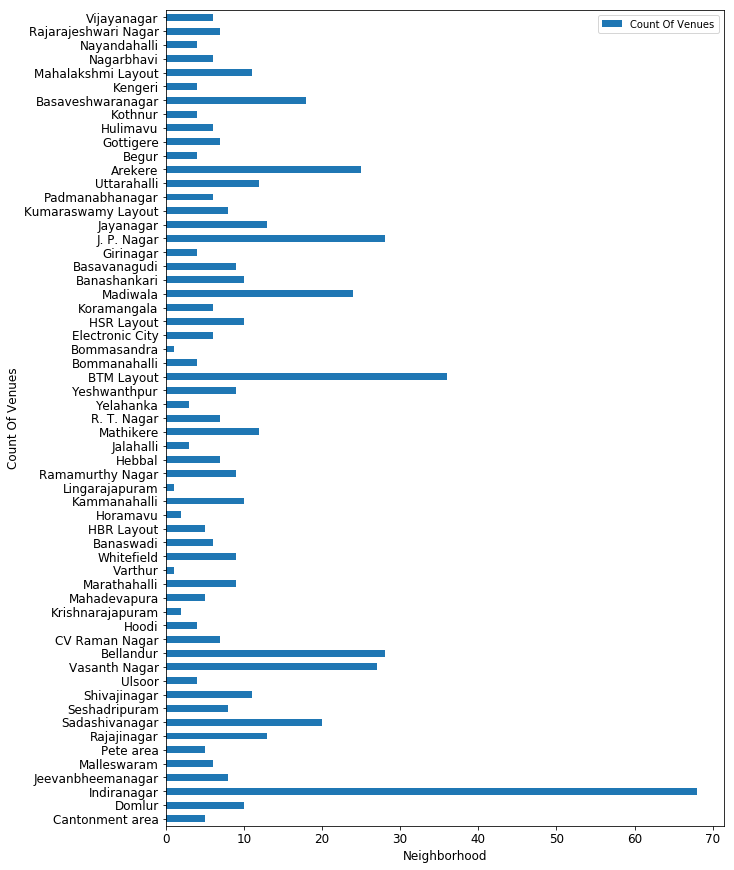

In [23]:
ax = delhi_count.set_index('Neighborhood').plot(kind='barh', figsize=(10, 15), legend=True, fontsize=12)
ax.set_xlabel("Neighborhood", fontsize=12)
ax.set_ylabel("Count Of Venues", fontsize=12)
plt.show()

In [24]:
delhi_venues[delhi_venues['Neighborhood']=='Whitefield']
delhi_onehot = pd.get_dummies(delhi_venues[['Venue Category']])
delhi_onehot['Neighborhood'] = delhi_venues['Neighborhood']
dehli_group = delhi_onehot.groupby('Neighborhood').mean().reset_index()
for i in dehli_group['Neighborhood']:
    print('---------',i,'---------')
    temp = dehli_group[dehli_group['Neighborhood'] == i].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(5))
    print('\n')

--------- Arekere ---------
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.16
1  Venue Category_Sporting Goods Shop       0.16
2     Venue Category_Department Store       0.08
3         Venue Category_Burger Joint       0.04
4          Venue Category_Supermarket       0.04


--------- BTM Layout ---------
                               Venue  Frequency
0   Venue Category_Indian Restaurant       0.17
1      Venue Category_Ice Cream Shop       0.08
2              Venue Category_Bakery       0.08
3  Venue Category_Chinese Restaurant       0.08
4         Venue Category_Snack Place       0.08


--------- Banashankari ---------
                                    Venue  Frequency
0        Venue Category_Indian Restaurant        0.2
1                     Venue Category_Café        0.2
2      Venue Category_Sporting Goods Shop        0.1
3           Venue Category_Clothing Store        0.1
4  Venue Category_North Indian Restaurant        0.1


--

In [25]:
def common_venues(row, top):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:top]

In [26]:
top = 10
indicators = ['st', 'nd', 'rd']
columns = ['Neighborhood']
for ind in np.arange(top):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
neighborhoods_sort = pd.DataFrame(columns=columns)
neighborhoods_sort['Neighborhood'] = dehli_group['Neighborhood']
for ind in np.arange(dehli_group.shape[0]):
    neighborhoods_sort.iloc[ind, 1:] =common_venues(dehli_group.iloc[ind, :], top)

neighborhoods_sort.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Badminton Court,Venue Category_Bus Line,Venue Category_Burger Joint,Venue Category_Breakfast Spot,Venue Category_Liquor Store,Venue Category_Neighborhood,Venue Category_Chinese Restaurant
1,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Bakery,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Sandwich Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Pizza Place,Venue Category_Fast Food Restaurant
2,Banashankari,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Sporting Goods Shop,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Clothing Store,Venue Category_Shoe Store,Venue Category_Cupcake Shop,Venue Category_Deli / Bodega
3,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Convenience Store,Venue Category_Bakery,Venue Category_Grocery Store,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Cupcake Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Flea Market
4,Basavanagudi,Venue Category_Indian Restaurant,Venue Category_Metro Station,Venue Category_Mediterranean Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Hookah Bar,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant


## find the best k value for clustering

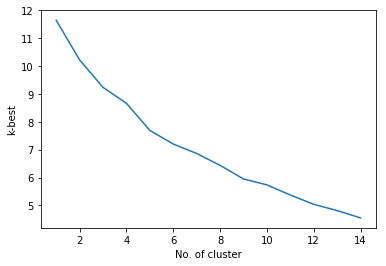

In [27]:
k_best = {}
for k in range(1,15):
    km = KMeans(n_clusters=k,random_state=0)
    km.fit(dehli_group.drop('Neighborhood',axis=1))
    dehli_group['Cluster'] = km.labels_
    k_best[k] = km.inertia_

plt.figure()
plt.plot(list(k_best.keys()), list(k_best.values()))
plt.xlabel("No. of cluster")
plt.ylabel("k-best")
plt.show()
print()

## From the above graph, according to elbow method best value for K is 2 

In [28]:
km = KMeans(n_clusters=2,random_state=0)

Fitting values

In [29]:
km.fit(dehli_group.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [30]:
dehli_group['Cluster'] = km.labels_
dehli_group.groupby('Cluster')['Neighborhood'].count()

Cluster
0    42
1    17
Name: Neighborhood, dtype: int64

In [31]:
neighborhoods_sort = neighborhoods_sort.merge(dehli_group,on='Neighborhood')
neighborhoods_sort.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Train Station,Venue Category_Travel & Transport,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Cluster
0,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Badminton Court,Venue Category_Bus Line,Venue Category_Burger Joint,Venue Category_Breakfast Spot,Venue Category_Liquor Store,Venue Category_Neighborhood,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0
1,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Bakery,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Sandwich Place,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Pizza Place,...,0.0,0.0,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0
2,Banashankari,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Sporting Goods Shop,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Clothing Store,Venue Category_Shoe Store,Venue Category_Cupcake Shop,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0
3,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Convenience Store,Venue Category_Bakery,Venue Category_Grocery Store,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Cupcake Shop,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,...,0.0,0.0,0.0,0.000000,0.0,0.166667,0.0,0.0,0.0,0
4,Basavanagudi,Venue Category_Indian Restaurant,Venue Category_Metro Station,Venue Category_Mediterranean Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Hookah Bar,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0
5,Basaveshwaranagar,Venue Category_Fast Food Restaurant,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Juice Bar,Venue Category_Food Truck,Venue Category_Snack Place,Venue Category_Sporting Goods Shop,Venue Category_Bakery,Venue Category_Burger Joint,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0
6,Begur,Venue Category_ATM,Venue Category_Supermarket,Venue Category_Clothing Store,Venue Category_Bakery,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,Venue Category_Electronics Store,Venue Category_Eastern European Restaurant,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1
7,Bellandur,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Café,Venue Category_Pizza Place,Venue Category_Dessert Shop,Venue Category_Bookstore,Venue Category_Lake,Venue Category_Kerala Restaurant,Venue Category_Lounge,...,0.0,0.0,0.0,0.035714,0.0,0.000000,0.0,0.0,0.0,0
8,Bommanahalli,Venue Category_Antique Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Movie Theater,Venue Category_Women's Store,Venue Category_Eastern European Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1
9,Bommasandra,Venue Category_Indian Restaurant,Venue Category_Women's Store,Venue Category_Diner,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,Venue Category_Falafel Restaurant,Venue Category_Electronics Store,Venue Category_Eastern European Restaurant,Venue Category_Donut Shop,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0


# Creating map and visualizing the data

In [32]:
neighborhoods_sort = neighborhoods_sort.merge(delhi_venues,on='Neighborhood')
map_clusters = folium.Map(location=[delhi_latitude, delhi_longitude], zoom_start=11)
neighborhoods_sort.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Wine Bar,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Badminton Court,Venue Category_Bus Line,Venue Category_Burger Joint,Venue Category_Breakfast Spot,Venue Category_Liquor Store,Venue Category_Neighborhood,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop
1,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Badminton Court,Venue Category_Bus Line,Venue Category_Burger Joint,Venue Category_Breakfast Spot,Venue Category_Liquor Store,Venue Category_Neighborhood,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Pizza Hut,12.889420,77.597494,Pizza Place
2,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Badminton Court,Venue Category_Bus Line,Venue Category_Burger Joint,Venue Category_Breakfast Spot,Venue Category_Liquor Store,Venue Category_Neighborhood,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Kababis,12.889605,77.597557,Indian Restaurant
3,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Badminton Court,Venue Category_Bus Line,Venue Category_Burger Joint,Venue Category_Breakfast Spot,Venue Category_Liquor Store,Venue Category_Neighborhood,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Guru Garden,12.891196,77.597979,Indian Restaurant
4,Arekere,Venue Category_Sporting Goods Shop,Venue Category_Indian Restaurant,Venue Category_Department Store,Venue Category_Badminton Court,Venue Category_Bus Line,Venue Category_Burger Joint,Venue Category_Breakfast Spot,Venue Category_Liquor Store,Venue Category_Neighborhood,...,0.0,0.0,0,SouthernSuburbs,12.8875,77.597,Zhangs Dynasty,12.889923,77.597804,Chinese Restaurant


# Adding colors and markers

In [33]:
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_sort['Neighborhood Latitude'], neighborhoods_sort['Neighborhood Longitude'], neighborhoods_sort['Neighborhood'], neighborhoods_sort['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)


In [36]:
map_clusters